# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Capstone Project-5 (Hand_Written_Digits)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Hand Written Digits Project

Data reference link : https://datahub.io/machine-learning/pendigits

# Exploratory Data Analysis and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf  # !pip install cufflinks

import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.figsize"] = (9, 5)

import warnings

warnings.filterwarnings('ignore')

In [2]:
df0 = pd.read_csv("pendigits_txt.csv")
df = df0.copy()

In [3]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.000,38.814,34.258,0.000,6.000,32.000,65.000,100.000
input2,10992.000,85.120,16.219,0.000,76.000,89.000,100.000,100.000
input3,10992.000,40.606,26.343,0.000,20.000,40.000,58.000,100.000
input4,10992.000,83.774,19.164,0.000,72.000,91.000,100.000,100.000
input5,10992.000,49.770,34.101,0.000,18.000,53.000,78.000,100.000
input6,10992.000,65.573,26.997,0.000,49.000,71.000,86.000,100.000
input7,10992.000,51.220,30.577,0.000,28.000,53.500,74.000,100.000
input8,10992.000,44.499,29.906,0.000,23.000,43.000,64.000,100.000
input9,10992.000,56.869,34.136,0.000,29.000,60.000,89.000,100.000
input10,10992.000,33.696,27.252,0.000,7.000,33.000,54.000,100.000


In [6]:
df["class"].value_counts()

class
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

In [7]:
df["class"].value_counts(normalize= True)

class
2   0.104
4   0.104
1   0.104
0   0.104
7   0.104
6   0.096
8   0.096
5   0.096
9   0.096
3   0.096
Name: proportion, dtype: float64

In [8]:
def summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function takes the target dataframe and checks the following:
        - num_rows
        - data_types
        - counts
        - min_values
        - max_values
        - uniques
        - nulls
    for all of the available columns.
    
    Args:
        df: The target dataframe.
        
    Returns:
        Summary dataframe with mentioned columns.
    """
        
    num_rows = df.shape[0]
    
    data_types = df.dtypes
    counts = df.apply(lambda x: x.count())
    
    min_value = df.min()
    max_value = df.max()
    
    uniques = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x: x.isnull().sum())
    
    print('Data shape:', df.shape)

    cols = ['data_types', 'counts', 'uniques', 'nulls', 'min_value', 'max_value']
    summary_df = pd.concat([data_types, counts, uniques, nulls, min_value, max_value],
                            axis = 1, sort = True)

    summary_df.columns = cols
    
    print('___________________________\nData Types:')
    print(summary_df["data_types"].value_counts())
    print('___________________________')
    
    return summary_df

summary(df)


Data shape: (10992, 17)
___________________________
Data Types:
data_types
int64    17
Name: count, dtype: int64
___________________________


,data_types,counts,uniques,nulls,min_value,max_value
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
# Note: For columns with a large number of unique values, printing all values might not be practical.
    # Therefore, if there are more than 10 unique values, only the first 10 are displayed.
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: input1
Number of Unique Values: 101
First 10 Unique Values: [ 47   0 100  13  57  74  48  91  35  50]
... and 91 more unique values

Column: input2
Number of Unique Values: 96
First 10 Unique Values: [100  89  57  67  39  87  96  74  85  76]
... and 86 more unique values

Column: input3
Number of Unique Values: 101
First 10 Unique Values: [27 31  7 49 88  3  2 12 22 62]
... and 91 more unique values

Column: input4
Number of Unique Values: 98
First 10 Unique Values: [ 81 100  68  92  83  99  72  62  50  65]
... and 88 more unique values

Column: input5
Number of Unique Values: 101
First 10 Unique Values: [ 57  42  72   5 100  49  26  11   0  88]
... and 91 more unique values

Column: input6
Number of Unique Values: 101
First 10 Unique Values: [ 37  75  90  68 100  74  35   5  38  31]
... and 91 more unique values

Column: input7
Number of Unique Values: 101
First 10 Unique Values: [ 26  29 100  19  81  17  85  63  56  25]
... and 91 more unique values

Column: input8
Number of 

## Data Clenaing

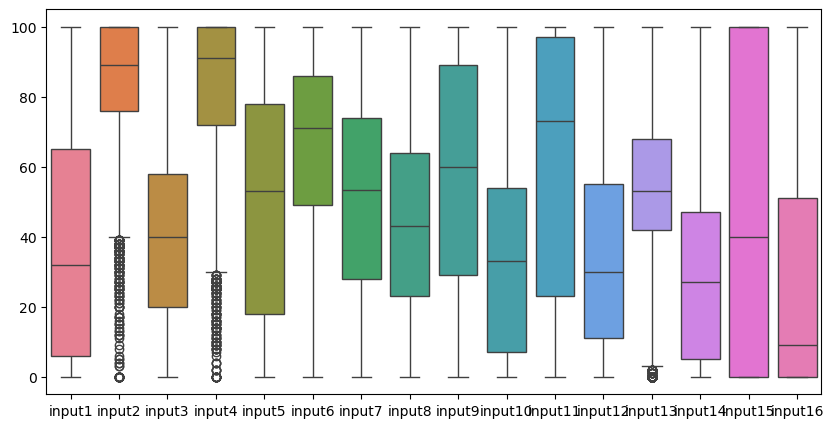

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df.drop("class", axis = 1))
plt.show()

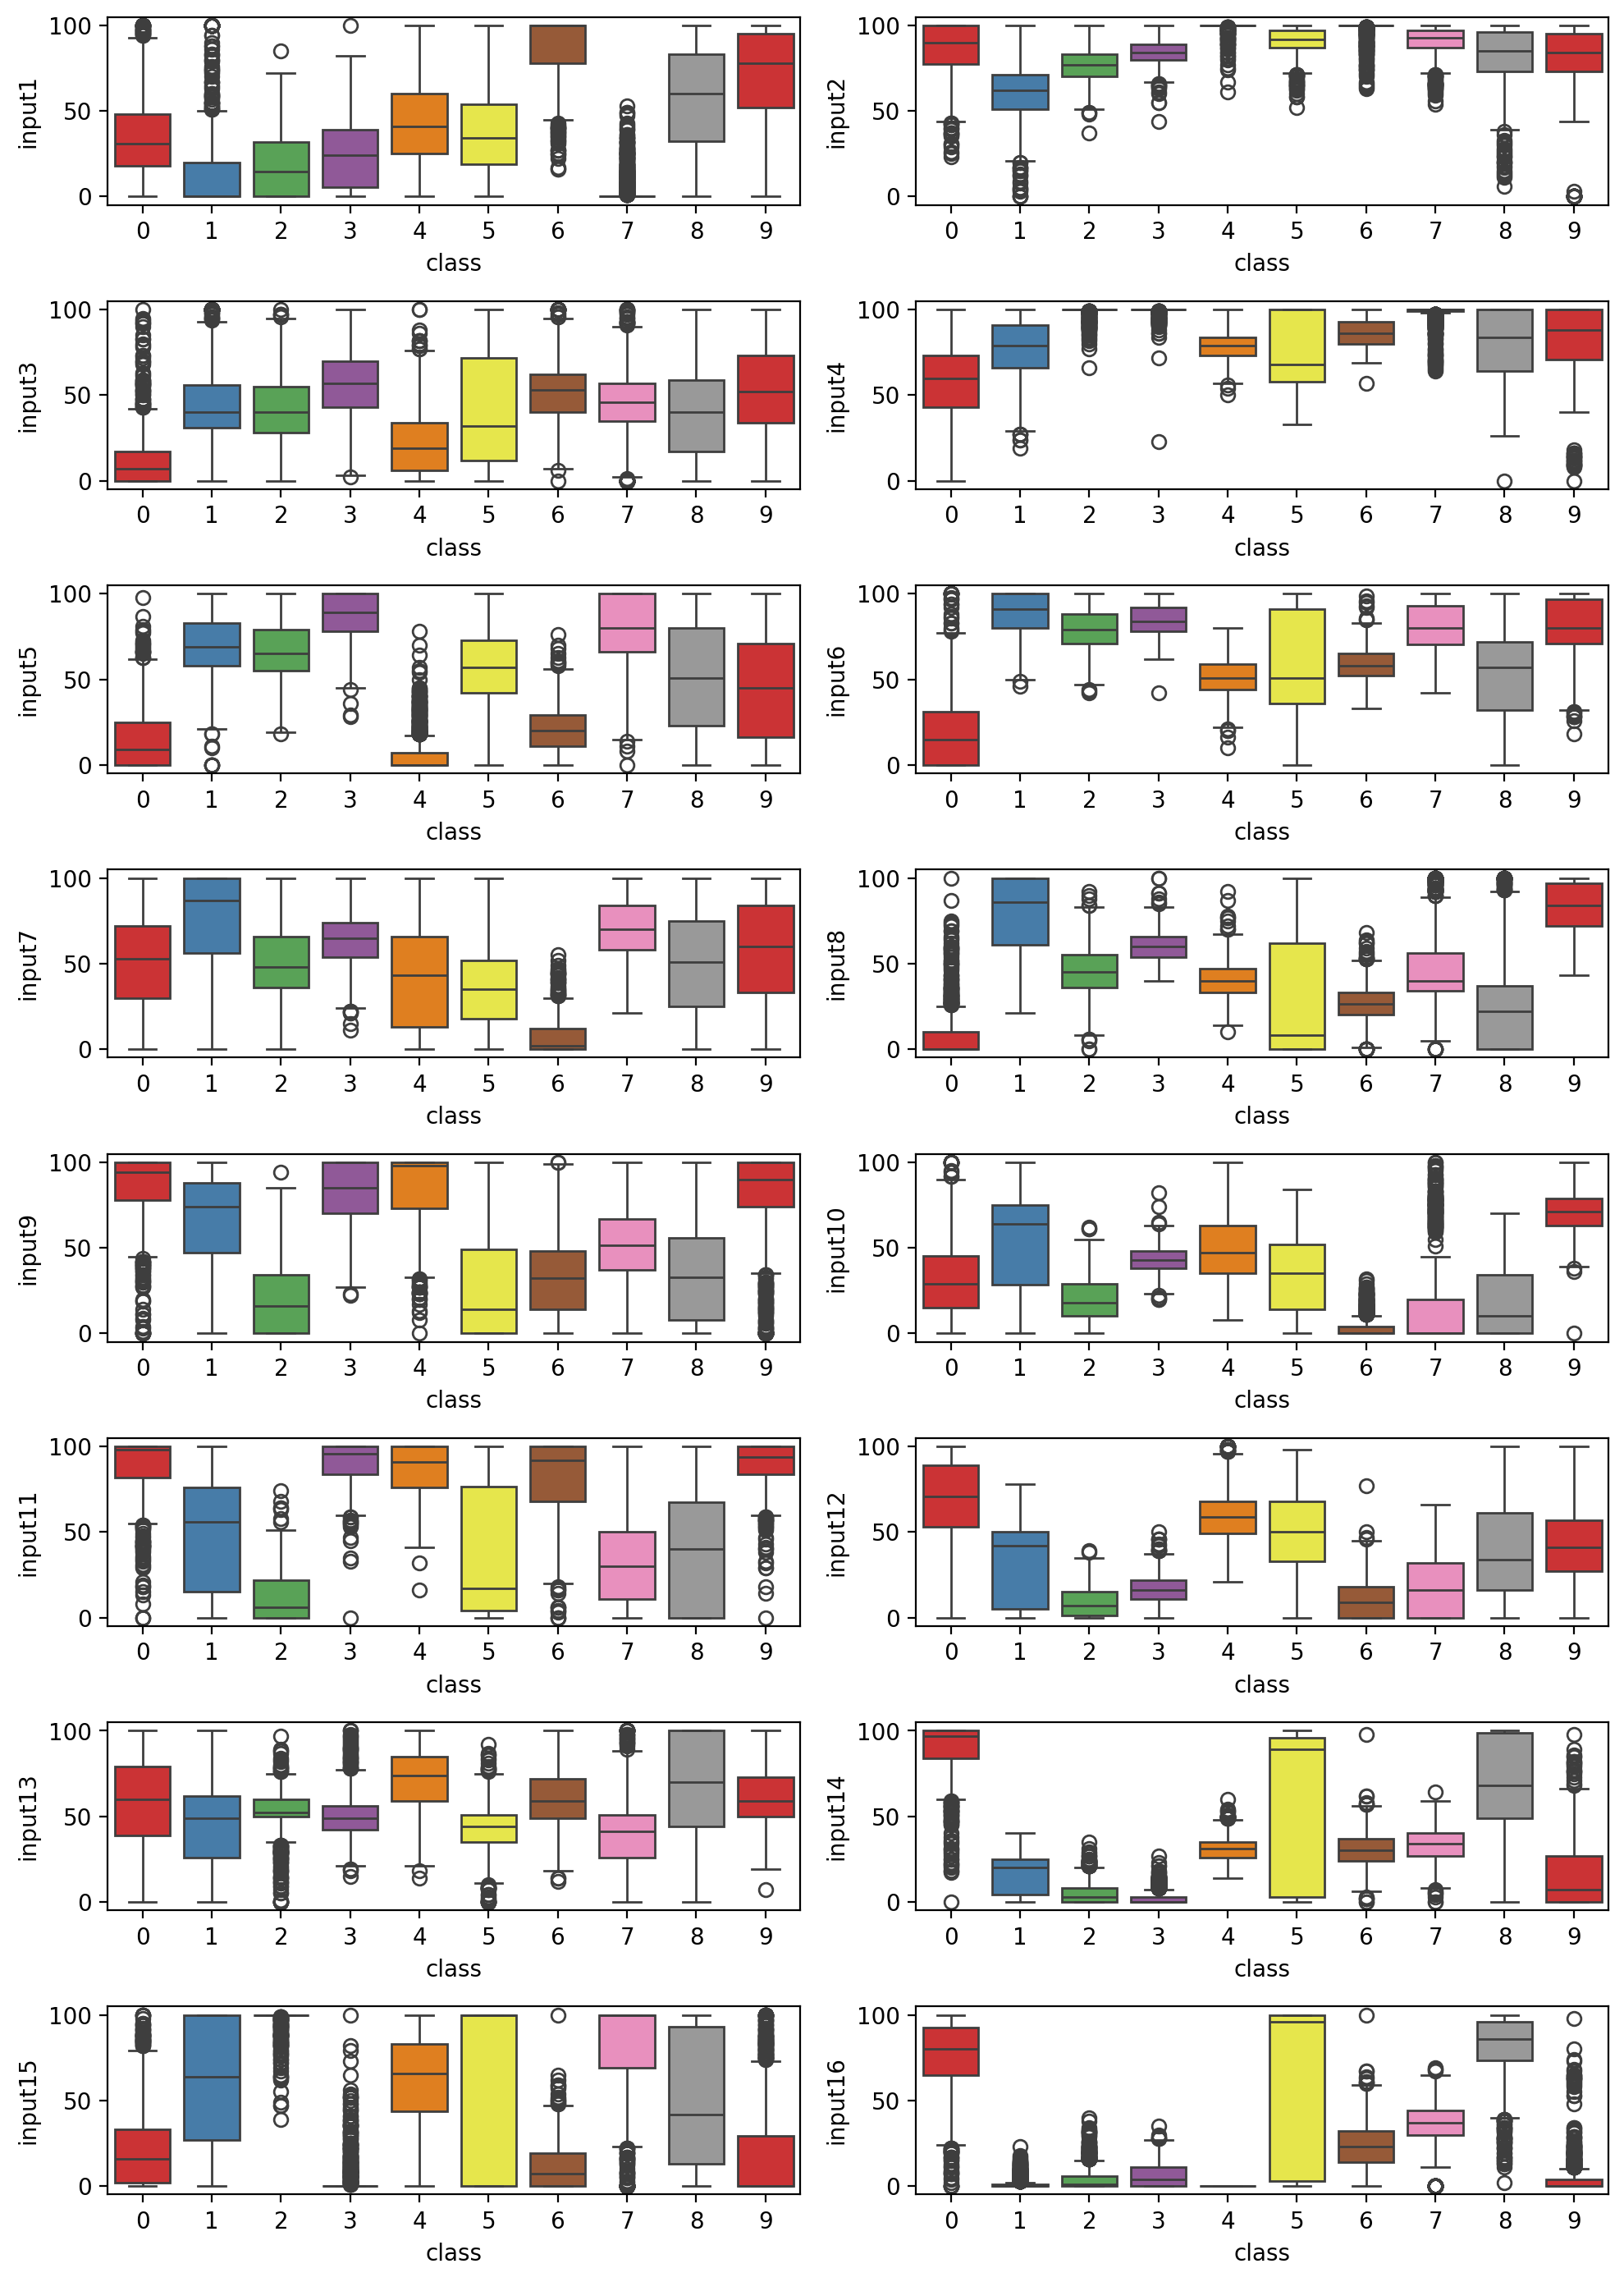

In [11]:
fig = plt.figure(figsize=(10,14), dpi=200)

for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df, palette ="Set1")

plt.tight_layout()
plt.show()

<Axes: >

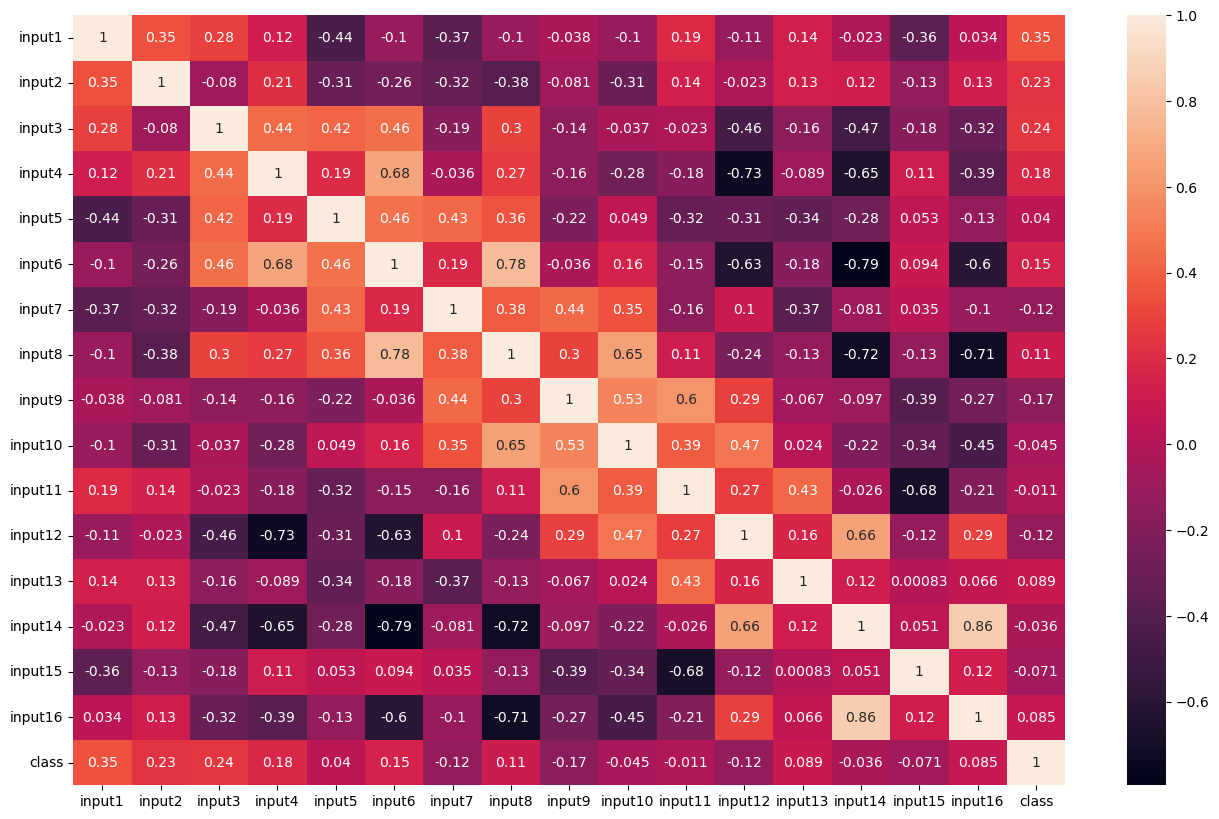

In [12]:
plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot = True)

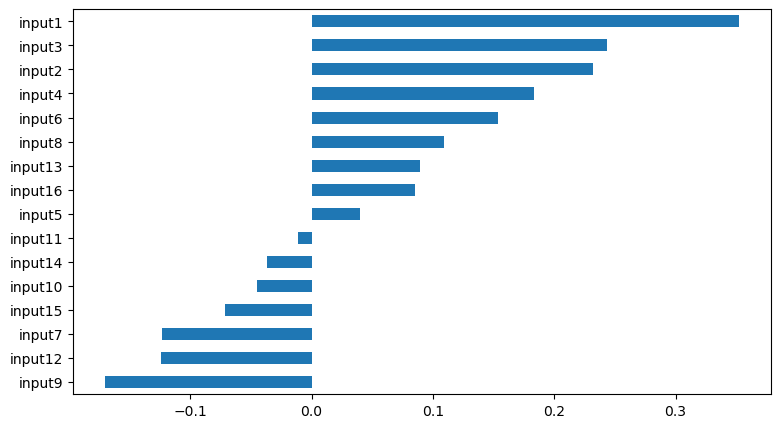

In [13]:
df.corr()["class"].drop("class").sort_values().plot.barh();

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(["class"], axis =1)
y= df["class"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size =0.1,stratify = y,  random_state =42)

# Support Vector Machine (SVM) Classifier

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [22]:
model =SVC(random_state=42)
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test ,y_test)

Test_Set
[[114   0   0   0   0   0   0   0   0   0]
 [  0 108   5   0   0   0   0   1   0   0]
 [  0   0 113   0   0   0   0   1   0   0]
 [  0   0   0 105   0   0   0   1   0   0]
 [  0   0   0   0 113   0   0   1   0   0]
 [  0   0   0   2   0 104   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   1   0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      0.95      0.97       114
           2       0.96      0.99      0.97       114
           3       0.98      0.99      0.99       106
           4       1.00      0.99      1.00       114
           5       1.00      0.98      0.99       106
           6       1.00      1.00      1.00       106
           7       0.96      1.00      0.98       114
           8       1.00      1.00      1.00       106
           9       

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [27]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(random_state = 42))]
pipe_model = Pipeline(steps=steps)

In [28]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[114   0   0   0   0   0   0   0   0   0]
 [  0 110   3   0   0   0   0   1   0   0]
 [  0   0 113   0   0   0   0   1   0   0]
 [  0   0   0 105   0   0   0   1   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   2   0 104   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   1   0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      0.96      0.98       114
           2       0.97      0.99      0.98       114
           3       0.98      0.99      0.99       106
           4       1.00      1.00      1.00       114
           5       1.00      0.98      0.99       106
           6       1.00      1.00      1.00       106
           7       0.97      1.00      0.98       114
           8       1.00      1.00      1.00       106
           9       

In [34]:
pipe_model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "recall_macro", "precision_macro", "f1_macro"], cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy           0.995
train_accuracy          0.996
test_recall_macro       0.995
train_recall_macro      0.996
test_precision_macro    0.995
train_precision_macro   0.996
test_f1_macro           0.995
train_f1_macro          0.996
dtype: float64

## Grid Search CV

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1],
             "SVC__gamma":["scale", "auto", 0.2, 0.3],
             "SVC__kernel":["rbf", "linear"]}

In [44]:

steps= [ ("scaler" ,  StandardScaler()), ("SVC", SVC(probability = True,class_weight="balanced", random_state = 42 ))]
pipe_model = Pipeline(steps = steps)
svm_grid_model = GridSearchCV(pipe_model, param_grid, scoring = "f1_macro", cv= 10)

In [46]:
svm_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='f1_macro')

In [ ]:
svm_grid_model.best_params_

In [ ]:
pd.DataFrame(svm_grid_model.cv_results_)

In [ ]:
svm_grid_model.best_score_

# Decision Tree (DT) Classifier

# Random Forest Classifier

# Choose the Best Model

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |